# Machine Learning Foundation

## Course 5, Part c: Backpropagation DEMO

## Overview
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Setup
import numpy as np
import matplotlib.pyplot as plt

In this exercise, we will prepare code to create a multi-layer perceptron with a single hidden layer (with 4 nodes) and train it via back-propagation.  We will take the following steps:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once the code is running, we can address the following questions:
- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

In [2]:
num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)
x_mat_full

array([[ 0.01877405, -0.89055421,  1.        ],
       [ 0.72582076,  0.65147191,  1.        ],
       [ 0.02089141, -0.88685488,  1.        ],
       ...,
       [ 0.96036702,  0.60966545,  1.        ],
       [ 0.81465384,  0.15090052,  1.        ],
       [-0.5545242 , -0.8707188 ,  1.        ]])

In [3]:
a = np.array([True, True, False, True])
b = np.array([[1, 2], [10, 20], [11, 22], [15, 25]])
b[a, 0]

array([ 1, 10, 15])

In [4]:
x_mat_full

array([[ 0.01877405, -0.89055421,  1.        ],
       [ 0.72582076,  0.65147191,  1.        ],
       [ 0.02089141, -0.88685488,  1.        ],
       ...,
       [ 0.96036702,  0.60966545,  1.        ],
       [ 0.81465384,  0.15090052,  1.        ],
       [-0.5545242 , -0.8707188 ,  1.        ]])

In [5]:
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)
y

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,

In [6]:
x_mat_full[y==1, 0]

array([ 1.87740478e-02,  2.08914123e-02, -2.71046986e-01,  2.62684450e-02,
        5.25302865e-01,  5.83355633e-01,  2.38211669e-01,  7.65551488e-02,
        6.65969316e-01,  2.35005781e-01,  3.10071266e-04, -3.46468673e-01,
        4.79847910e-01,  2.80322777e-01,  2.18292271e-01, -5.93509283e-01,
        8.00548289e-01,  9.44487350e-02, -3.18610016e-01,  4.15553773e-01,
       -1.87901980e-02, -6.61752219e-01,  3.67859628e-01,  1.85644850e-01,
       -4.09994325e-01,  9.30704665e-01,  4.75175343e-01,  4.26086670e-01,
        7.36484854e-02,  3.63627370e-01, -2.48578208e-01, -2.91954115e-01,
       -2.48005114e-01, -1.60840152e-01, -1.37936987e-01, -2.56393313e-01,
        5.68847909e-01,  2.69437292e-01, -2.16395415e-01,  3.93267479e-01,
       -4.94568078e-01,  8.94244797e-02, -5.10118211e-01,  2.21729891e-02,
       -3.20532584e-01, -3.11310364e-01, -3.07315023e-01, -3.97344507e-01,
       -6.58866597e-01, -4.38714826e-01, -3.97232414e-01, -6.22143701e-02,
        4.47954127e-02, -

shape of x_mat_full is (500, 3)
shape of y is (500,)


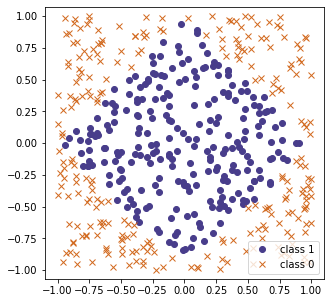

In [7]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

num_obs = 500
x_mat_1 = np.random.uniform(-1,1,size = (num_obs,2))
x_mat_bias = np.ones((num_obs,1))
x_mat_full = np.concatenate( (x_mat_1,x_mat_bias), axis=1)

# PICK ONE PATTERN BELOW and comment out the rest.

# # Circle pattern
# y = (np.sqrt(x_mat_full[:,0]**2 + x_mat_full[:,1]**2)<.75).astype(int)

# # Diamond Pattern
y = ((np.abs(x_mat_full[:,0]) + np.abs(x_mat_full[:,1]))<1).astype(int)

# # Centered square
# y = ((np.maximum(np.abs(x_mat_full[:,0]), np.abs(x_mat_full[:,1])))<.5).astype(int)

# # Thick Right Angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>-.5)).astype(int)

# # Thin right angle pattern
# y = (((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))<.5) & ((np.maximum((x_mat_full[:,0]), (x_mat_full[:,1])))>0)).astype(int)


print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x_mat_full[y==1, 0],x_mat_full[y==1, 1], 'o', label='class 1', color='darkslateblue')
ax.plot(x_mat_full[y==0, 0],x_mat_full[y==0, 1], 'x', label='class 0', color='chocolate')
# ax.grid(True)
ax.legend(loc='best')
ax.axis('equal');

In [8]:
ax.axis('equal')

(-1.0998794576302535,
 1.098138288358709,
 -1.0960354602433664,
 1.0996426003749333)

Here are some helper functions

In [9]:
# def sigmoid(x):
#     """
#     Sigmoid function
#     """
#     return 1.0 / (1.0 + np.exp(-x))


# def loss_fn(y_true, y_pred, eps=1e-16):
#     """
#     Loss function we would like to optimize (minimize)
#     We are using Logarithmic Loss
#     http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
#     """
#     y_pred = np.maximum(y_pred,eps)
#     y_pred = np.minimum(y_pred,(1-eps))
#     return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


# def forward_pass(W1, W2):
#     """
#     Does a forward computation of the neural network
#     Takes the input `x_mat` (global variable) and produces the output `y_pred`
#     Also produces the gradient of the log loss function
#     """
#     global x_mat
#     global y
#     global num_
#     # First, compute the new predictions `y_pred`
#     z_2 = np.dot(x_mat, W_1)
#     a_2 = sigmoid(z_2)
#     z_3 = np.dot(a_2, W_2)
#     y_pred = sigmoid(z_3).reshape((len(x_mat),))
#     # Now compute the gradient
#     J_z_3_grad = -y + y_pred
#     J_W_2_grad = np.dot(J_z_3_grad, a_2)
#     a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
#     J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
#     gradient = (J_W_1_grad, J_W_2_grad)
    
#     # return
#     return y_pred, gradient


# def plot_loss_accuracy(loss_vals, accuracies):
#     fig = plt.figure(figsize=(16, 8))
#     fig.suptitle('Log Loss and Accuracy over iterations')
    
#     ax = fig.add_subplot(1, 2, 1)
#     ax.plot(loss_vals)
#     ax.grid(True)
#     ax.set(xlabel='iterations', title='Log Loss')
    
#     ax = fig.add_subplot(1, 2, 2)
#     ax.plot(accuracies)
#     ax.grid(True)
#     ax.set(xlabel='iterations', title='Accuracy');

In [14]:
a

array([ True,  True, False,  True])

In [10]:
a
c = b.copy()
c = c*2
d = np.array([[1, 2, 3], [3, 4, 5]])
c.dot(d).shape
np.dot(c, d).shape

(4, 3)

In [34]:
e = np.array([1, 5])

In [35]:
e.shape

(2,)

In [37]:
f = np.array([[1,2,3,4,5], [10,20,30,40,50]])

In [40]:
np.dot(e, f)

array([ 51, 102, 153, 204, 255])

In [47]:
b*c

array([[   2,    8],
       [ 200,  800],
       [ 242,  968],
       [ 450, 1250]])

In [52]:
a = np.array([1,2,3])

In [54]:
b

array([[ 1,  2],
       [10, 20],
       [11, 22],
       [15, 25]])

In [56]:
a.shape

(3,)

In [57]:
a

array([1, 2, 3])

In [60]:
a = a.reshape(-1,1)

In [62]:
a

array([[1],
       [2],
       [3]])

In [61]:
a.shape

(3, 1)

In [63]:
y

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,

In [67]:
x_mat_full

array([[ 0.54927873, -0.3008635 ,  1.        ],
       [ 0.15103476, -0.76711566,  1.        ],
       [-0.23832149, -0.85719953,  1.        ],
       ...,
       [ 0.32098236, -0.04785816,  1.        ],
       [-0.01385653, -0.83927107,  1.        ],
       [ 0.2820392 , -0.99544421,  1.        ]])

In [13]:
# Practice
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    """
    y_pred = np.maximum(y_pred,eps)
    y_pred = np.minimum(y_pred,(1-eps))
    return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

# def loss_fn(y_true, y_pred, eps=1e-16):
#     y_pred = np.maximum(y_pred, eps)
#     y_pred = np.minimum(y_pred, (1-eps))
#     return -(np.sum(y_true * np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)


def forward_pass(W1, W2):
    global x_mat
    global y
    global num_

    z_2 = np.dot(x_mat, W_1)    # (500, 3) x (3, 4) = (500, 4)
    a_2 = sigmoid(z_2)          # (500, 4)
    z_3 = np.dot(a_2, W_2)      # (500, 4) x (4, 1) = (500, 1)
    y_pred = sigmoid(z_3).reshape((len(x_mat),))      # (500, 1) -> (500, )
    
    J_z_3_grad = -y + y_pred      # (500, )
    J_W_2_grad = np.dot(J_z_3_grad, a_2)      # (500, ) x (500, 4) = (4, )
    a_2_z_2_grad = sigmoid(z_2)*(1 - sigmoid(z_2))  # (500, 4) * (500, 4) = (500, 4)
#     J_W_1_grad = a_1 * a_2_z_2_grad * W_2 * J_z_3_grad
#     J_W_1_grad = np.dot(x_mat, a_2_z_2_grad).dot(W_2).dot(J_z_3_grad)
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1,1), W_2.reshape(-1,1).T)*a_2_z_2_grad).T.dot(x_mat).T
                 # (500, ) -> (500, 1) x (4 x 1).T = (500, 4) * (500, 4) = (500, 4).T = (4, 500) x (500, 3) = (4, 3).T = (3, 4)
    gradient = (J_W_1_grad, J_W_2_grad)
    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 8))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss_vals)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Log Loss')
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(accuracies)
    ax.grid(True)
    ax.set(xlabel='iterations', title='Accuracy');

In [ ]:
w1 = np.random.uniform(-1,1,size=(3,4))
w2 = np.random.uniform(-1,1,size=(4,1))


In [13]:
w2 = np.random.uniform(-1,1,size=(4,1))
w2

array([[ 0.73320693],
       [ 0.83707681],
       [-0.08862416],
       [-0.63152008]])

In [14]:
# #### Initialize the network parameters

# np.random.seed(1241)

# W_1 = np.random.uniform(-1,1,size=(3,4))
# W_2 = np.random.uniform(-1,1,size=(4))
# num_iter = 10000
# learning_rate = .001
# x_mat = x_mat_full


# loss_vals, accuracies = [], []
# for i in range(num_iter):
#     ### Do a forward computation, and get the gradient
#     y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
#     ## Update the weight matrices
#     W_1 = W_1 - learning_rate*J_W_1_grad 
#     W_2 = W_2 - learning_rate*J_W_2_grad
    
#     ### Compute the loss and accuracy
#     curr_loss = loss_fn(y,y_pred)
#     loss_vals.append(curr_loss)
#     acc = np.sum((y_pred>=.5) == y)/num_obs
#     accuracies.append(acc)

#     ## Print the loss and accuracy for every 200th iteration
#     if((i%200) == 0):
#         print('iteration {}, log loss is {:.4f}, accuracy is {}'.format(
#             i, curr_loss, acc
#         ))
# plot_loss_accuracy(loss_vals, accuracies)

In [15]:
a
a1 = np.array([0, 0, 0, 1, 1, 1])
a2 = np.array([1, 2, 3, 4, 5, 1])
(a2 >= 3) == a1

np.sum((a2 >= 3) == a1)


4

iteration 0, log loss is 0.812938, accuracy is 0.5
iteration 200, log loss is 0.688275, accuracy is 0.57
iteration 400, log loss is 0.675736, accuracy is 0.594
iteration 600, log loss is 0.632371, accuracy is 0.724
iteration 800, log loss is 0.572200, accuracy is 0.718
iteration 1000, log loss is 0.545397, accuracy is 0.73
iteration 1200, log loss is 0.534986, accuracy is 0.74
iteration 1400, log loss is 0.506506, accuracy is 0.754
iteration 1600, log loss is 0.424979, accuracy is 0.828
iteration 1800, log loss is 0.358038, accuracy is 0.88
iteration 2000, log loss is 0.323337, accuracy is 0.888
iteration 2200, log loss is 0.298240, accuracy is 0.902
iteration 2400, log loss is 0.272902, accuracy is 0.908
iteration 2600, log loss is 0.247542, accuracy is 0.928
iteration 2800, log loss is 0.226706, accuracy is 0.938
iteration 3000, log loss is 0.210762, accuracy is 0.952
iteration 3200, log loss is 0.198534, accuracy is 0.956
iteration 3400, log loss is 0.188967, accuracy is 0.97
iterat

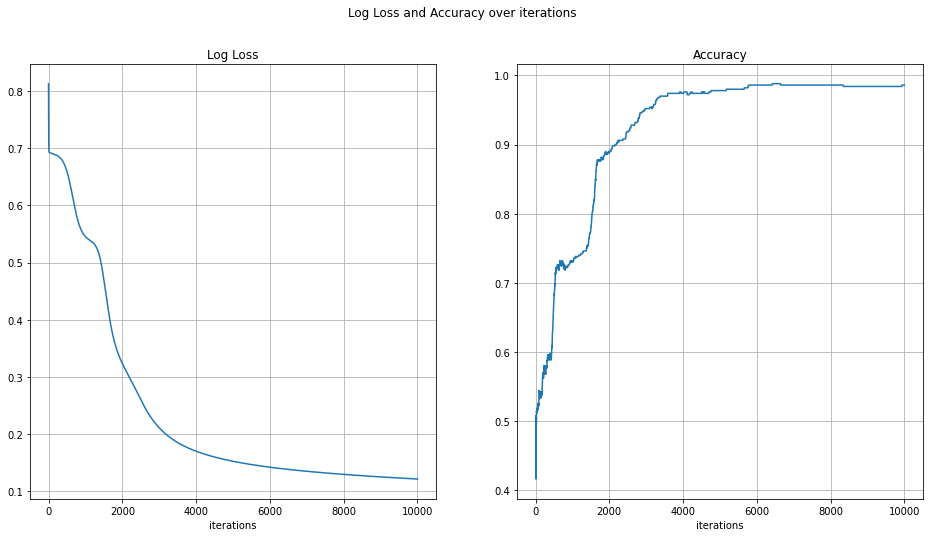

In [16]:
# Practice
np.random.seed(1241)

W_1 = np.random.uniform(-1, 1, size=(3,4))
W_2 = np.random.uniform(-1, 1, size=(4))
num_iter = 10000
learning_rate = .001
x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(num_iter):
    y_pred, (J_W_1_grad, J_W_2_grad) = forward_pass(W_1, W_2)
    
    W_1 = W_1 - learning_rate * J_W_1_grad
    W_2 = W_2 - learning_rate * J_W_2_grad
    
    curr_loss = loss_fn(y, y_pred)
    loss_vals.append(curr_loss)
    acc = np.sum((y_pred>=0.5) == y)/num_obs
    accuracies.append(acc)
    
    if((i%200)==0):
        print('iteration {}, log loss is {:4f}, accuracy is {}'.format(i, curr_loss, acc))
plot_loss_accuracy(loss_vals, accuracies)


Plot the predicted answers, with mistakes in yellow

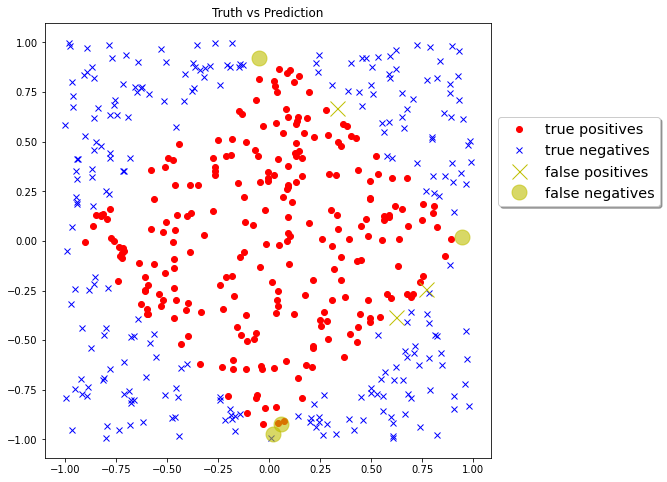

In [17]:
pred1 = (y_pred>=.5)
pred0 = (y_pred<.5)

fig, ax = plt.subplots(figsize=(8, 8))
# true predictions
ax.plot(x_mat[pred1 & (y==1),0],x_mat[pred1 & (y==1),1], 'ro', label='true positives')
ax.plot(x_mat[pred0 & (y==0),0],x_mat[pred0 & (y==0),1], 'bx', label='true negatives')
# false predictions
ax.plot(x_mat[pred1 & (y==0),0],x_mat[pred1 & (y==0),1], 'yx', label='false positives', markersize=15)
ax.plot(x_mat[pred0 & (y==1),0],x_mat[pred0 & (y==1),1], 'yo', label='false negatives', markersize=15, alpha=.6)
ax.set(title='Truth vs Prediction')
ax.legend(bbox_to_anchor=(1, 0.8), fancybox=True, shadow=True, fontsize='x-large');

---
### Machine Learning Foundation (C) 2020 IBM Corporation